## Neural Network  Learning

Try to find the best 2 Layer Neural Network model for a classification problem

Given a handwritten digit from MNIST classify it as 4 or 9 [4 & 9 are the most difficult digits to classify]

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd 
import numpy.random as rn

### Data loading

This data is saved in a python pickle format.  
Here is the code to load the data and 
save it to different numpy arrays



In [83]:
# Read the data 
train_df = pd.read_csv("/home/splab-ece/labs/fml/data/mnist/mnist_train.csv")
data = train_df.to_numpy()
data = data.T;
# Reading the data and labels
tr_labels = data[0,:]
tr_data   = data[1:,:]


train_df = pd.read_csv("/home/splab-ece/labs/fml/data/mnist/mnist_test.csv")
data = train_df.to_numpy()
data = data.T
# Reading the data and labels
ts_labels = data[0,:]
ts_data   = data[1:,:]

print(tr_data.shape, ts_data.shape)

(784, 60000) (784, 10000)


Let us display Random 10 samples and their labels

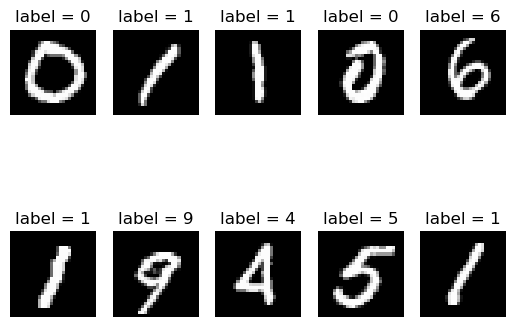

In [84]:
import random 

for i in range(10):
    index = random.randint (0,tr_data.shape[0])
    img = tr_data[:,index].reshape(28,28)
    plt.subplot(2,5,i+1)
    plt.title('label = '+str(tr_labels[index]))
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    

### Data Preparation 
We want to train a Neural network classifier between classes 4 and 9

we need to do the following  data preparation steps
   - separate the training data of classes 4 and 9 
   - make labels class 4 as zero and class 9 as 1 
   - normalize input features

In [85]:
''' Here we separate the training data and test data for 
    classes from all other data.    We also change the 
    labels of class 4 as zero and class 9 as 1
'''
# We separate training and labels for class 4 and 9 alone
sub_index    = (tr_labels == 9) | (tr_labels == 4) # finding indexes
tr_datasub  = tr_data[:,sub_index]  # separating training data
tr_labelsub = tr_labels[sub_index] # separating training labels
tr_labelsub[tr_labelsub==4] = 0
tr_labelsub[tr_labelsub==9] = 1
tr_labelsub = tr_labelsub.reshape(1,-1)

# Repeat the process for test data
sub_index    = (ts_labels == 9) | (ts_labels == 4) # finding indexes
ts_datasub  = ts_data[:,sub_index]  # separating training data
ts_labelsub = ts_labels[sub_index] # separating training labels
ts_labelsub[ts_labelsub==4] = 0
ts_labelsub[ts_labelsub==9] = 1
ts_labelsub = ts_labelsub.reshape(1,-1)

In [86]:
'''  
We have one more important step before training.
i.e., feature normalization.   These inputs being images, 
they are always between 0 -255.   Here we divide all the 
features with 255, so that they are between 0 and1 
'''
tr_datasub = tr_datasub/255.0 
ts_datasub = ts_datasub/255.0 

In [87]:
print(tr_datasub.shape, ts_datasub.shape)

(784, 11791) (784, 1991)


### Learning Neural Network  - Steps 
Now we do the batch gradient descent. here we need to do the following steps 
  - Initialize the parameters of the logistic regression
  - Find the objective function for training and test data        (For checking the algorithm )
  - choose a learning parameter
  - Now start the learning process
       - Randomly shuffle the training data and labels
       - Go batch by batch : For each batch 
       - Compute the output, Find the gradient 
       - adjust the parameters 
            




In [88]:
'''
Initialize the Neural Network parameters 
----------------------------------------
Let us implement a neural network with 
25 hidden neurons.   We have two sets of weight 
matrices W_1 and W_2 

We need to randomly initialize using np.random.rand

Important Note -- we cannot set them to be zeros 
'''
def init_params():
    W_1 = np.random.rand(25,784)
    b_1 = np.random.rand(25,1)

    W_2 = np.random.rand(1,25)
    b_2 = np.random.rand(1,1)
    
    return (W_1,b_1,W_2,b_2)



In [95]:
def compute_pred(data,Params):
    (W_1,b_1,W_2,b_2) = Params
    
    # <TODO> y that is output 
    # of hidden layer 
    # Please be aware that data is not a vector
    a_1 = np.dot(W_1,data)+b_1  # a_1 is W^T x + B activation 
    y   = 1/(1+np.exp(-a_1))  # y_1 is the sigmoid output 
    a_2 =  np.dot(W_2,y)+b_2  # second level activation 
    z   = 1/(1+np.exp(-a_2))  # Second sigmoid output
    
    return (z,y) ; # Return both first and second layer outputs


def compute_obj_function(labels, z):
    labels = labels.reshape(1, -1)
    z = z.reshape(1, -1)
    obj = -np.mean(labels * np.log(z) + (1 - labels) * np.log(1 - z ))
    return obj

def compute_grad(data, labels, Params):
    (W_1, b_1, W_2, b_2) = Params
    N = data.shape[1]
    
    z, y = compute_pred(data, Params)
    
    delta_2 = z - labels
    dW_2 = np.dot(delta_2, y.T) / N
    db_2 = np.mean(delta_2)
    
    delta_1 = np.dot(W_2.T, delta_2) * y * (1 - y)
    dW_1 = np.dot(delta_1, data.T) / N
    db_1 = np.mean(delta_1)
    
    return dW_1, db_1, dW_2, db_2

def random_shuffle(data, labels):
    arr = np.array(range(labels.shape[1]))
    np.random.shuffle(arr)
    data = data[:, arr]
    labels = labels[:, arr]
    return data, labels

#### Sanity Checks
 Just try to call all the functions to make 
 sure that there is no syntax error, shapes etc.

In [96]:
# Learning parameter 
alpha = 0.0001

# Elementary shape checks

Params = init_params(); 
(W_1,b_1,W_2, b_2) = Params
print(W_1.shape,b_1.shape,W_2.shape, b_2.shape)
print(tr_datasub.shape)
print(tr_labelsub.shape)

print(ts_datasub.shape)
print(ts_labelsub.shape)

    
(z,y1) = compute_pred(tr_datasub,Params)    
obj = compute_obj_function(tr_labelsub,z )
print("Train objective function =", obj)
(z,y2) = compute_pred(ts_datasub,Params)    
obj = compute_obj_function(ts_labelsub,z)
print(" Test objective function =", obj)

dParams = compute_grad(tr_datasub,tr_labelsub,Params);
(dW_1,db_1,dW_2,db_2) = dParams ;

#print('Gradient Shapes = ', dW_1.shape,db_1.shape,dW_2.shape,db_2.shape)

''' Find the gradient w.r.t W_1[0,0]
'''
def gradient_check(Params,tr_datasub,tr_labelsub):
    (W_1,b_1,W_2, b_2) = Params
    eps = 0.0001
    W_2p = np.copy(W_2)  # Find gradient w.r.t any 
    W_2n = np.copy(W_2)   # coefficient by changing this 
    W_2p[0,0] +=  eps
    W_2n[0,0] -=  eps
    #b_1p = np.copy(b_1)
    #b_1n = np.copy(b_1)
    #b_1p[0,0] += eps
    #b_1n[0,0] -= eps
    Params_p = (W_1,b_1,W_2p,b_2)
    Params_n = (W_1,b_1,W_2n,b_2)
    (z,y) = compute_pred(tr_datasub,Params_p)    
    objp = compute_obj_function(tr_labelsub,z )
    (z,y) = compute_pred(tr_datasub,Params_n)    
    objn = compute_obj_function(tr_labelsub,z )
    deriv = (objp - objn)/(2*eps)
    print("Gradient Check ",  deriv)

gradient_check(Params,tr_datasub,tr_labelsub)
print("Back Propagation Deriv ",dW_2[0,0] )

    
print("Gradient Descent : ")

alpha = 0.0001

W_1 = W_1 - alpha * dW_1;
b_1 = b_1 - alpha * db_1;
W_2 = W_2 - alpha * dW_2;
b_2 = b_2 - alpha * db_2;

Params = (W_1,b_1,W_2, b_2) ;

# Compute once again objective function.
# it must have improved if everything is correct

(z,y) = compute_pred(tr_datasub,Params)    
obj = compute_obj_function(tr_labelsub,z )
print("Train objective function =", obj)    

(25, 784) (25, 1) (1, 25) (1, 1)
(784, 11791)
(1, 11791)
(784, 1991)
(1, 1991)
Train objective function = 6.925907838935518
 Test objective function = 6.8945515470399386
Gradient Check  0.49546201129402334
Back Propagation Deriv  0.49546179149300745
Gradient Descent : 
Train objective function = 6.92526958469885


#### Batch Gradient Descent

Here we use the initialized parameters and 
above functions to do the batch gradient descent 

Tr obj = 6.549502735130548 Ts obj = 6.519850580850021
Tr obj = 6.173738074762765 Ts obj = 6.145787163512807
Tr obj = 5.7978492754847295 Ts obj = 5.771600179889289
Tr obj = 5.42203489927051 Ts obj = 5.3974873050026355
Tr obj = 5.046113028106698 Ts obj = 5.023267470170098
Tr obj = 4.670172261193783 Ts obj = 4.649028928363859
Tr obj = 4.294393469082214 Ts obj = 4.274951848296004
Tr obj = 3.918886779631035 Ts obj = 3.9011461087228154
Tr obj = 3.5436939471334967 Ts obj = 3.5276538070344294
Tr obj = 3.1693783726290414 Ts obj = 3.1550369219384025
Tr obj = 2.797251698727995 Ts obj = 2.7846035250729098
Tr obj = 2.429173952943485 Ts obj = 2.4182101351087857
Tr obj = 2.069737014803294 Ts obj = 2.0604376245355183
Tr obj = 1.727455551191582 Ts obj = 1.7197801725602266
Tr obj = 1.416510649978585 Ts obj = 1.4103831382630014
Tr obj = 1.1563562089854282 Ts obj = 1.1516434674038347
Tr obj = 0.9625350389758808 Ts obj = 0.9590435291026197
Tr obj = 0.8372354299027026 Ts obj = 0.8347236432736542
Tr obj = 0.

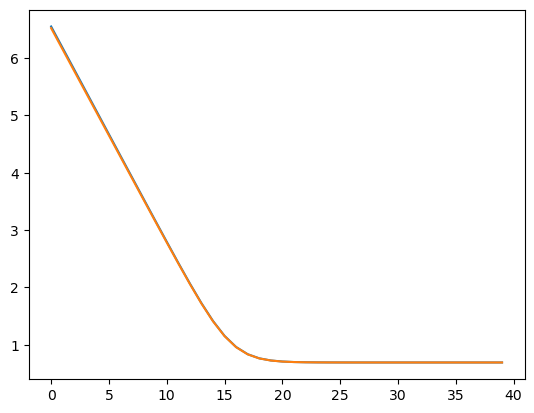

In [97]:
N_Epochs   =  40 # Number of sweeps through the training data 
Batch_size =  20 # Number of training examples in a single batch
N_tr_samples = tr_datasub.shape[1]
N_ts_samples = ts_datasub.shape[1]

N_batches = int(N_tr_samples/Batch_size)

tr_obj_fn = np.zeros (N_Epochs)
ts_obj_fn = np.zeros (N_Epochs)


for i in range(N_Epochs):
    # Randomly shuffle data 
    (data,labels)= random_shuffle(tr_datasub,tr_labelsub)
    #print("Data shape =", data.shape,labels.shape)
    for j in range (N_batches):
        start = j*Batch_size;
        end = (j+1)*(Batch_size);
        batch_data   = data[:,start:end]
        batch_labels = labels[:,start:end]
        #print(start,end, batch_data.shape, batch_labels.shape)
        dParams = compute_grad(batch_data,batch_labels,Params);
        (dW_1,db_1,dW_2,db_2) = dParams ;
        (W_1,b_1,W_2,b_2) = Params;
        W_1 = W_1 - alpha * dW_1;
        b_1 = b_1 - alpha * db_1;
        W_2 = W_2 - alpha * dW_2;
        b_2 = b_2 - alpha * db_2;
        Params = (W_1,b_1,W_2,b_2)
    (z,y) = compute_pred(tr_datasub,Params)    
    tr_obj_fn[i] = compute_obj_function(tr_labelsub,z )    
    (z,y) = compute_pred(ts_datasub,Params)    
    ts_obj_fn[i] = compute_obj_function(ts_labelsub,z )    
    print('Tr obj =',tr_obj_fn[i], 'Ts obj =',ts_obj_fn[i])

        
plt.plot(tr_obj_fn);
plt.plot(ts_obj_fn);
plt.show();

# Find the accuracy on training and test data 
